In [1]:
#title: Minimizing KL-divergence by SGD
#2020-06-30

In [443]:
import numpy as np
import random
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

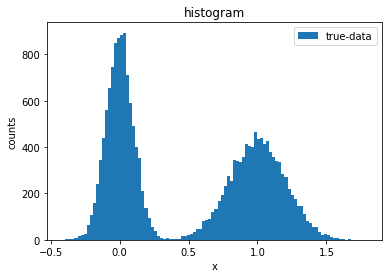

In [472]:
#Gernerate-the-true-data
number = 10000
mu, sigma = 0, 0.1 
p1 = np.random.normal(mu, sigma, number)
mu, sigma = 1, 0.2
p2 = np.random.normal(mu, sigma, number)
truedatas = np.hstack((p1,p2))

counts,bins,_ = plt.hist(truedatas,100,label='true-data')
plt.xlabel('x')
plt.ylabel('counts')
plt.legend()
plt.title('histogram')

#probability-distribution
p = counts/(2*number)

--------------------------

Q* from

In [445]:
intervals = np.array([bins[i+1]-bins[i] for i in range(len(bins)-1)])

def gaussian(mu,sigma,xs = bins[1:], ints=intervals) -> np.array:
    return (1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (xs - mu)**2 / (2 * sigma**2)))*intervals

def KLD(p,q) -> float:
    return np.sum(np.where(p!=0,p*np.log(p/q),0))

Text(0.5, 1.0, 'KLD = 0.6337353')

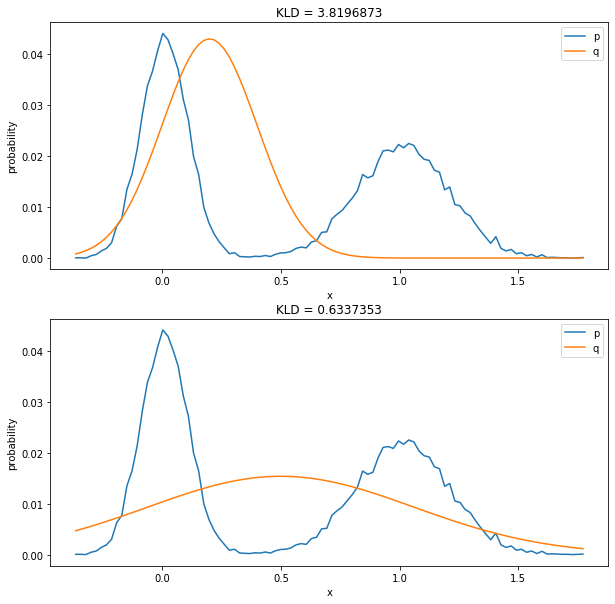

In [446]:
#test-code
plt.figure(figsize= (10,10))

q= gaussian(0.2,0.2)
plt.subplot(2,1,1)
plt.plot(bins[1:],p,label='p')
plt.plot(bins[1:],q,label='q')
plt.legend()
plt.ylabel('probability')
plt.xlabel('x')
plt.title('KLD = %f3'%KLD(p,q))

q= gaussian(0.5,0.56)
plt.subplot(2,1,2)
plt.plot(bins[1:],p,label='p')
plt.plot(bins[1:],q,label='q')
plt.legend()
plt.ylabel('probability')
plt.xlabel('x')
plt.title('KLD = %f3'%KLD(p,q))

Text(0.5, 1.0, 'Contour plot')

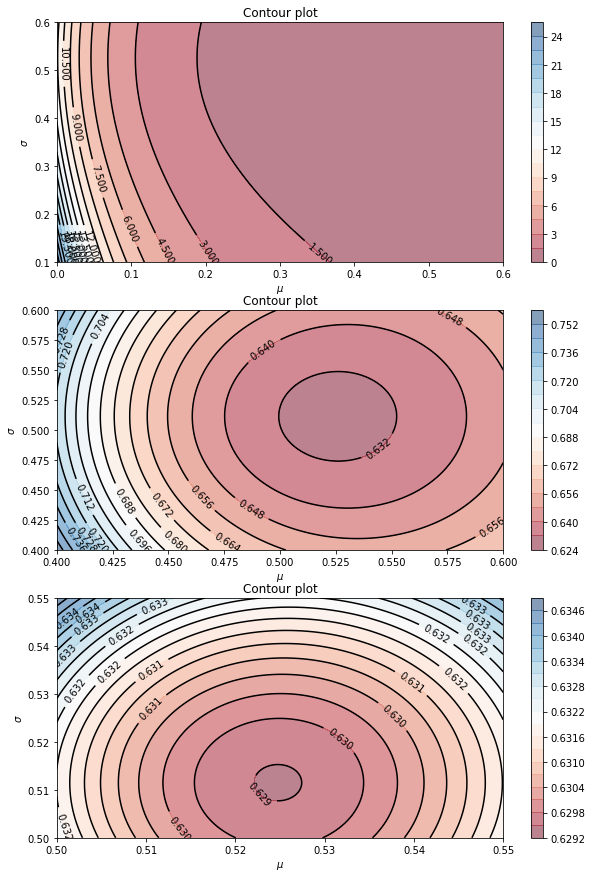

In [447]:
#contour-plot
plt.figure(figsize= (10,15))

plt.subplot(3,1,1)
n = 256
mus = np.linspace(0, 0.6, n)
sigmas = np.linspace(0.1, 0.6, n)

height = np.zeros((n,n))
for i,mu in enumerate(mus):
    for j,sigma in enumerate(sigmas):
        q = gaussian(mu,sigma)
        height[i,j] = KLD(p,q)

# x,y = np.meshgrid(mus,sigmas)
plt.contourf(mus,sigmas, height, 20,alpha=0.5, cmap='RdBu')
plt.colorbar()
C = plt.contour(mus,sigmas, height, 20, colors='black')
plt.clabel(C, inline=True, fontsize=10)
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.title('Contour plot')

plt.subplot(3,1,2)
n = 256
mus = np.linspace(0.4, 0.6, n)
sigmas = np.linspace(0.4, 0.6, n)

height = np.zeros((n,n))
for i,mu in enumerate(mus):
    for j,sigma in enumerate(sigmas):
        q = gaussian(mu,sigma)
        height[i,j] = KLD(p,q)

# x,y = np.meshgrid(mus,sigmas)
plt.contourf(mus,sigmas, height, 20,alpha=0.5, cmap='RdBu')
plt.colorbar()
C = plt.contour(mus,sigmas, height, 20, colors='black')
plt.clabel(C, inline=True, fontsize=10)
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.title('Contour plot')

plt.subplot(3,1,3)
n = 256
mus = np.linspace(0.5, 0.55, n)
sigmas = np.linspace(0.5, 0.55, n)

height = np.zeros((n,n))
for i,mu in enumerate(mus):
    for j,sigma in enumerate(sigmas):
        q = gaussian(mu,sigma)
        height[i,j] = KLD(p,q)

# x,y = np.meshgrid(mus,sigmas)
plt.contourf(mus,sigmas, height, 20,alpha=0.5, cmap='RdBu')
plt.colorbar()
C = plt.contour(mus,sigmas, height, 20, colors='black')
plt.clabel(C, inline=True, fontsize=10)
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.title('Contour plot')

In [449]:
def grad_mu(p,mu,sigma,xs=bins[1:]):
    return np.sum(-p*(xs-mu)/sigma**2)

def grad_sigma(p,mu,sigma,xs=bins[1:]):
    return np.sum(-p*((xs-mu)**2/sigma**3-1/sigma))

Text(0, 0.5, 'cost')

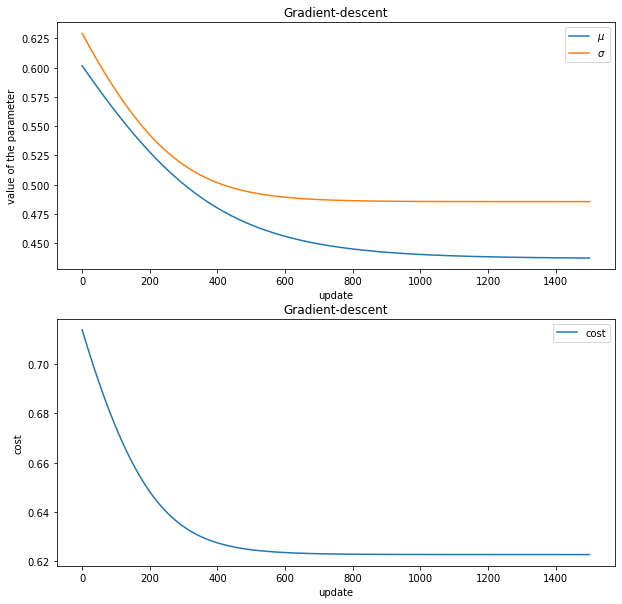

In [466]:
mu = np.random.random()
sigma = np.random.random()
mus = [mu]
sigmas = [sigma]
loss = [KLD(p,gaussian(mu,sigma))]
eta = 0.001
for i in range(1500):
#     q = gaussian(mu,sigma)
    mu = mus[-1] - eta*grad_mu(p,mus[-1],sigmas[-1])
    sigma = sigmas[-1] -eta*grad_sigma(p,mus[-1],sigmas[-1])
    mus.append(mu)
    sigmas.append(sigma)
    loss.append(KLD(p,gaussian(mu,sigma)))

plt.figure(figsize= (10,10))
plt.subplot(2,1,1)
plt.plot(mus,'-',label='$\mu$')
plt.plot(sigmas,'-',label='$\sigma$')
plt.legend()
plt.title('Gradient-descent')
plt.xlabel('update')
plt.ylabel('value of the parameter')

plt.subplot(2,1,2)
plt.plot(loss,'-',label='cost')
plt.legend()
plt.title('Gradient-descent')
plt.xlabel('update')
plt.ylabel('cost')

Text(0.5, 1.0, '$\\mu$ = 0.5143573, $\\sigma$ = 0.5248373, KLD = 0.6294893')

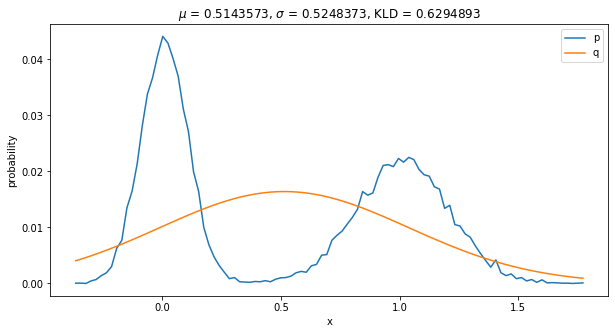

In [451]:
mu = mus[-1]
sigma = sigmas[-1]

plt.figure(figsize= (10,5))
q= gaussian(mu,sigma)
plt.plot(bins[1:],p,label='p')
plt.plot(bins[1:],q,label='q')
plt.legend()
plt.ylabel('probability')
plt.xlabel('x')
plt.title('$\mu$ = %f3, $\sigma$ = %f3, KLD = %f3'%(mu,sigma,KLD(p,q)))

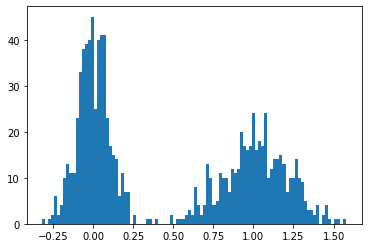

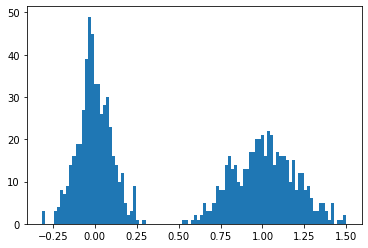

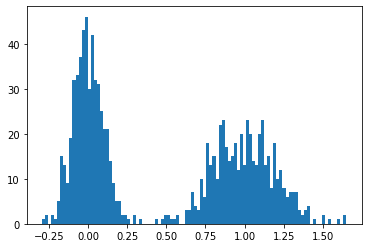

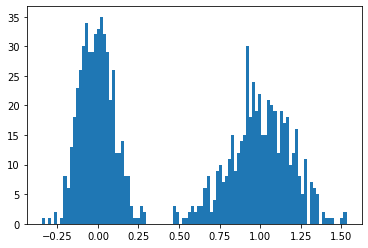

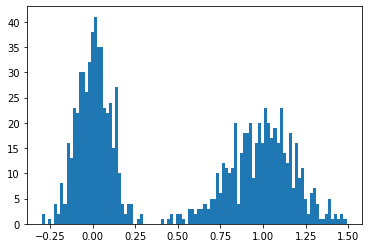

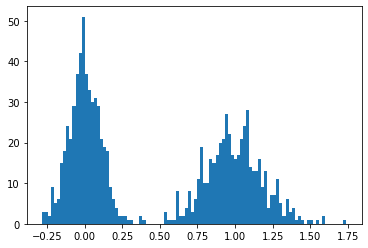

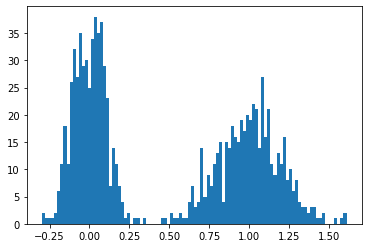

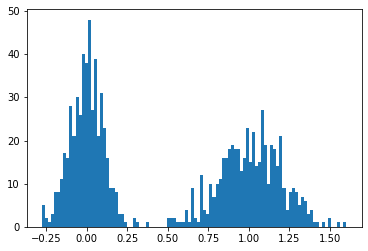

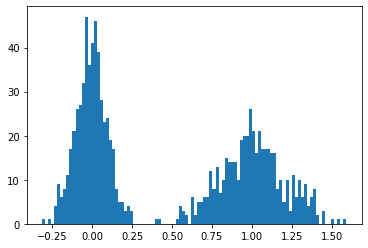

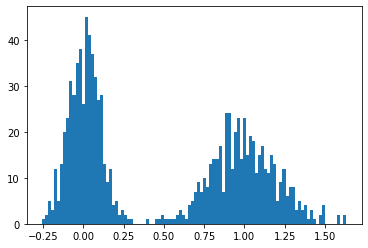

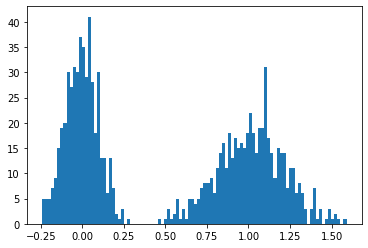

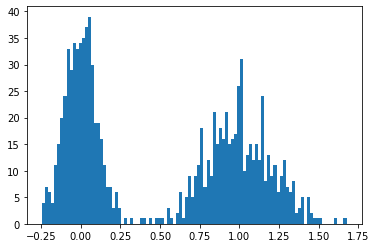

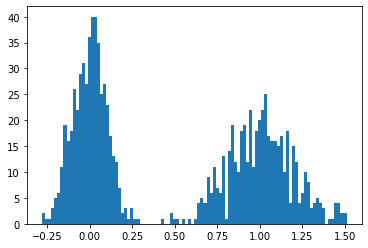

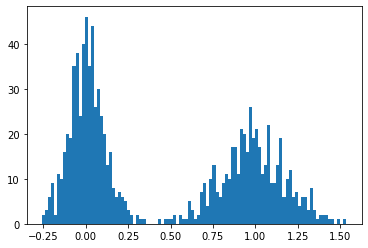

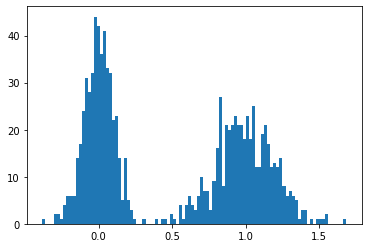

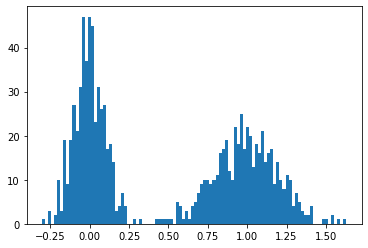

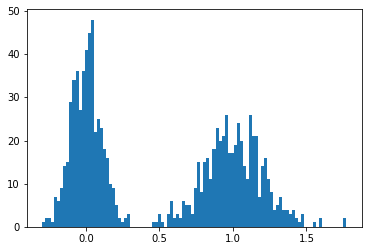

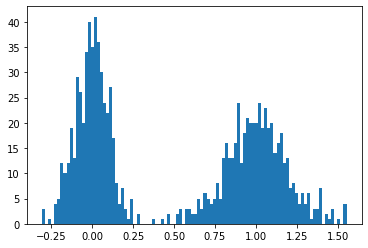

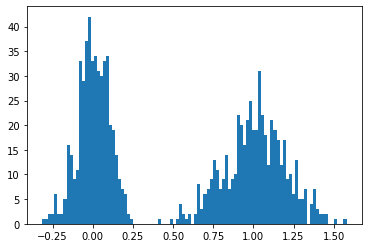

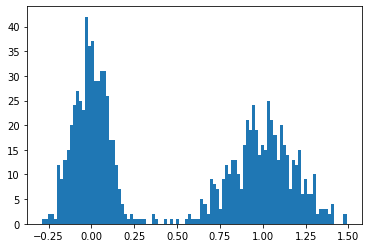

In [452]:
#form-batches
batch_size = 1000
random.shuffle(truedatas)
datas = np.array(np.split(truedatas,int(20000/batch_size)))
temp = np.array([0.]*100)
for data in datas:
    fig = plt.figure()
    counts,bins,_ = plt.hist(data,bins=100)
    temp = np.r_[temp,counts/sum(counts)]
ps = temp[100:].reshape(int(20000/1000),int(100))

In [453]:
def SGD(epochs, ps, mu0, sigma0, eta = 0.001, xs= bins[1:]):
    mu = mu0
    sigma = sigma0
    mus = [mu]
    sigmas = [sigma]
    loss = []
    for epoch in range(epochs):
        for p in ps:
            mu = mus[-1] - eta*grad_mu(p,mus[-1],sigmas[-1])
            sigma = sigmas[-1] -eta*grad_sigma(p,mus[-1],sigmas[-1])
            mus.append(mu)
            sigmas.append(sigma)
        loss.append(KLD(ps[-1],gaussian(mu,sigma)))
#         print(KLD(ps[-1],gaussian(mu,sigma)))
    return mus,sigmas,loss

Text(0, 0.5, 'parameter value')

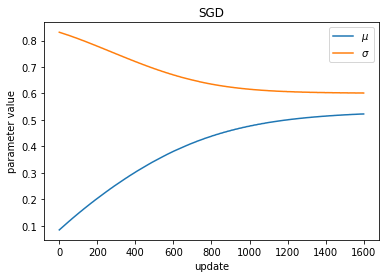

In [454]:
mu0 = np.random.random()
sigma0 = np.random.random()
# ps = formbatches(truedatas)
mus, sigmas, loss = SGD(80, ps, mu0, sigma0)
plt.plot(mus,label='$\mu$')
plt.plot(sigmas,label='$\sigma$')
plt.title('SGD')
plt.legend()
plt.xlabel('update')
plt.ylabel('parameter value')

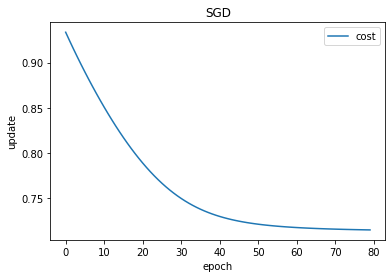

In [455]:
plt.plot(loss,label='cost')
plt.xlabel('epoch')
plt.ylabel('update')
plt.title('SGD')
plt.legend()

Text(0.5, 1.0, '$\\mu$ = 0.5226503, $\\sigma$ = 0.6017503, KLD = 0.6467953')

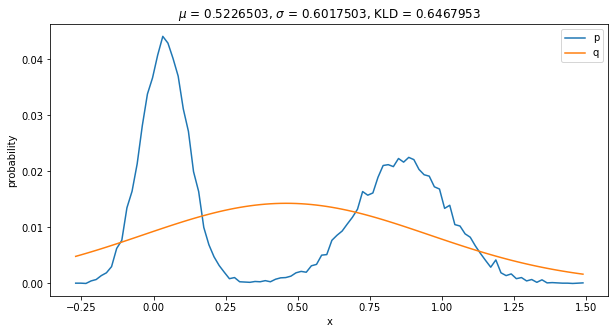

In [456]:
mu = mus[-1]
sigma = sigmas[-1]

plt.figure(figsize= (10,5))
q= gaussian(mu,sigma)
plt.plot(bins[1:],p,label='p')
plt.plot(bins[1:],q,label='q')
plt.legend()
plt.ylabel('probability')
plt.xlabel('x')
plt.title('$\mu$ = %f3, $\sigma$ = %f3, KLD = %f3'%(mu,sigma,KLD(p,q)))

--------------------

Q* to

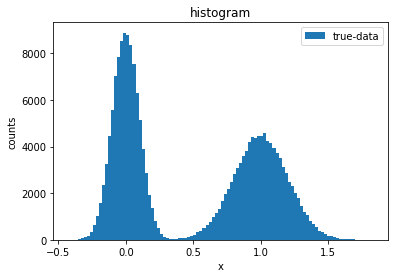

In [483]:
#Gernerate-the-true-data
number = 10**5
mu, sigma = 0, 0.1 
p1 = np.random.normal(mu, sigma, number)
mu, sigma = 1, 0.2
p2 = np.random.normal(mu, sigma, number)
truedatas = np.hstack((p1,p2))

counts,bins,_ = plt.hist(truedatas,100,label='true-data')
plt.xlabel('x')
plt.ylabel('counts')
plt.legend()
plt.title('histogram')

#probability-distribution
p_total = counts/(2*number)

intervals = np.array([bins[i+1]-bins[i] for i in range(len(bins)-1)])

def gaussian(mu,sigma,xs = bins[1:], ints=intervals) -> np.array:
    return (1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (xs - mu)**2 / (2 * sigma**2)))*intervals

Text(0.5, 1.0, 'KLD = 0.7017333')

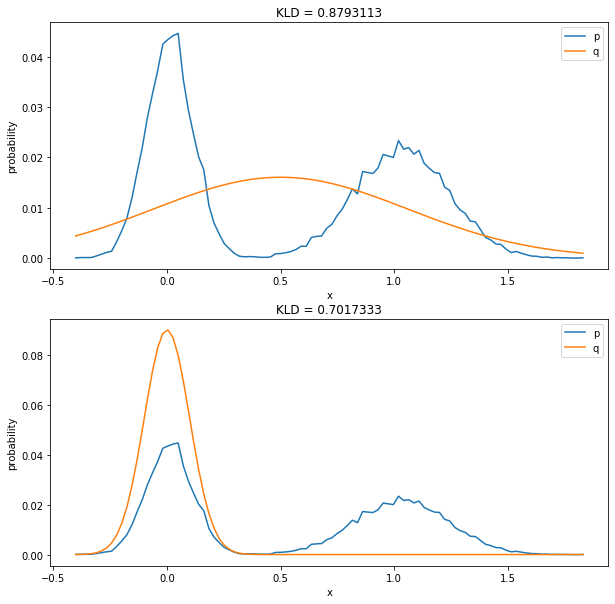

In [484]:
def KLD2(q,p) -> float:
    return np.sum(np.where(p!=0,q*np.log(q/p),0))

plt.figure(figsize= (10,10))

q= gaussian(0.5,0.56)
plt.subplot(2,1,1)
plt.plot(bins[1:],p,label='p')
plt.plot(bins[1:],q,label='q')
plt.legend()
plt.ylabel('probability')
plt.xlabel('x')
plt.title('KLD = %f3'%KLD2(q,p))

q= gaussian(0,0.1)
plt.subplot(2,1,2)
plt.plot(bins[1:],p,label='p')
plt.plot(bins[1:],q,label='q')
plt.legend()
plt.ylabel('probability')
plt.xlabel('x')
plt.title('KLD = %f3'%KLD2(q,p))

Text(0.5, 1.0, 'Contour plot')

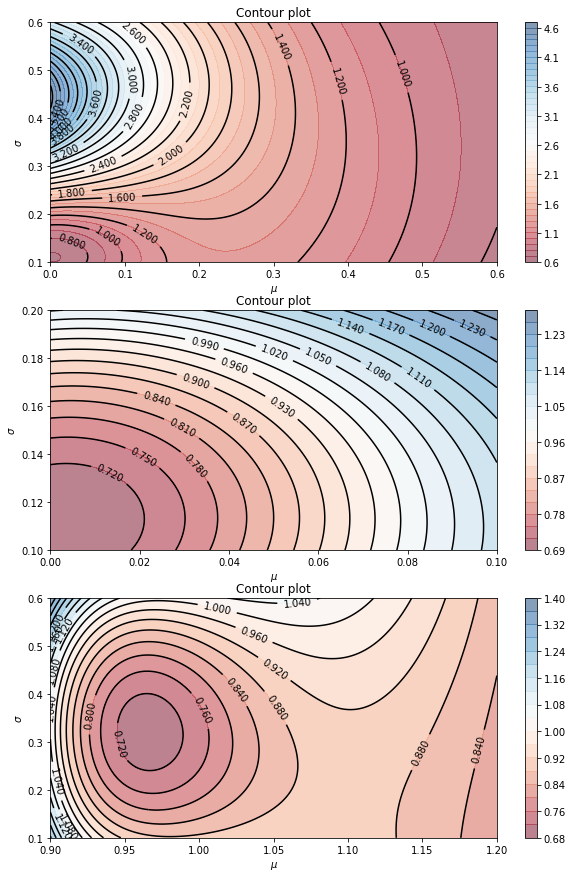

In [485]:
#contour-plot
plt.figure(figsize= (10,15))

plt.subplot(3,1,1)
n = 256
mus = np.linspace(0, 0.6, n)
sigmas = np.linspace(0.1, 0.6, n)

height = np.zeros((n,n))
for i,mu in enumerate(mus):
    for j,sigma in enumerate(sigmas):
        q = gaussian(mu,sigma)
        height[i,j] = KLD2(q,p)
#         print(height[i,j])

x,y = np.meshgrid(mus,sigmas)
plt.contourf(mus,sigmas, height, 40,alpha=0.5, cmap='RdBu')
plt.colorbar()
C = plt.contour(mus,sigmas, height, 20, colors='black')
plt.clabel(C, inline=True, fontsize=10)
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.title('Contour plot')

plt.subplot(3,1,2)
n = 256
mus = np.linspace(0, 0.1, n)
sigmas = np.linspace(0.1, 0.2, n)

height = np.zeros((n,n))
for i,mu in enumerate(mus):
    for j,sigma in enumerate(sigmas):
        q = gaussian(mu,sigma)
        height[i,j] = KLD2(q,p)

# x,y = np.meshgrid(mus,sigmas)
plt.contourf(mus,sigmas, height, 20,alpha=0.5, cmap='RdBu')
plt.colorbar()
C = plt.contour(mus,sigmas, height, 20, colors='black')
plt.clabel(C, inline=True, fontsize=10)
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.title('Contour plot')

plt.subplot(3,1,3)
n = 256
mus = np.linspace(0.9, 1.2, n)
sigmas = np.linspace(0.1, 0.6, n)

height = np.zeros((n,n))
for i,mu in enumerate(mus):
    for j,sigma in enumerate(sigmas):
        q = gaussian(mu,sigma)
        height[i,j] = KLD2(q,p)

# x,y = np.meshgrid(mus,sigmas)
plt.contourf(mus,sigmas, height, 20,alpha=0.5, cmap='RdBu')
plt.colorbar()
C = plt.contour(mus,sigmas, height, 20, colors='black')
plt.clabel(C, inline=True, fontsize=10)
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.title('Contour plot')

In [486]:
def grad_mu2(p,mu,sigma,xs=bins[1:]):
    q = gaussian(mu,sigma)
    return np.sum(np.where(p!=0,(1-np.log(p/q))*q*(xs-mu)/sigma**2,0))

def grad_sigma2(p,mu,sigma,xs=bins[1:]):
    q = gaussian(mu,sigma)
    return np.sum(np.where(p!=0,((1-np.log(p/q))*q*((xs-mu)**2/sigma**3-1/sigma)),0))

Text(0.5, 1.0, 'KLD = 0.6923323')

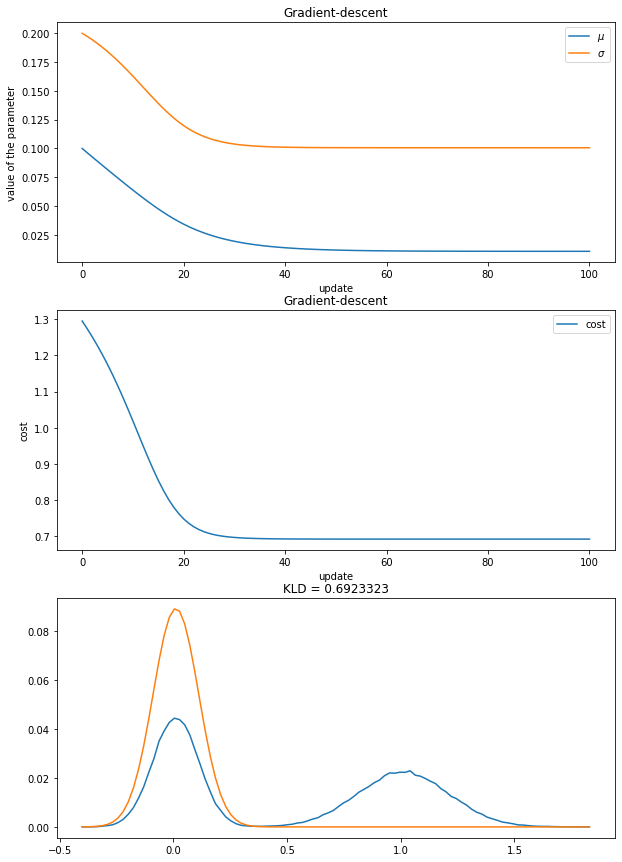

In [490]:
mu = 0.1
sigma = 0.2
mus = [mu]
sigmas = [sigma]
loss = [KLD2(gaussian(mu,sigma),p_total)]

eta = 0.001
for i in range(100):
    mu = mus[-1] - eta*grad_mu2(p_total,mus[-1],sigmas[-1])
    sigma = sigmas[-1] -eta*grad_sigma2(p_total,mus[-1],sigmas[-1])
    mus.append(mu)
    sigmas.append(sigma)
    loss.append(KLD2(gaussian(mu,sigma),p_total))

plt.figure(figsize= (10,15))
plt.subplot(3,1,1)
plt.plot(mus,'-',label='$\mu$')
plt.plot(sigmas,'-',label='$\sigma$')
plt.legend()
plt.title('Gradient-descent')
plt.xlabel('update')
plt.ylabel('value of the parameter')

plt.subplot(3,1,2)
plt.plot(loss,'-',label='cost')
plt.legend()
plt.title('Gradient-descent')
plt.xlabel('update')
plt.ylabel('cost')

plt.subplot(3,1,3)
plt.plot(bins[1:],p_total)
plt.plot(bins[1:],gaussian(mus[-1],sigmas[-1]))
plt.title('KLD = %f3'%KLD2(gaussian(mus[-1],sigmas[-1]),p_total))

Text(0.5, 1.0, 'KLD = 0.6924513')

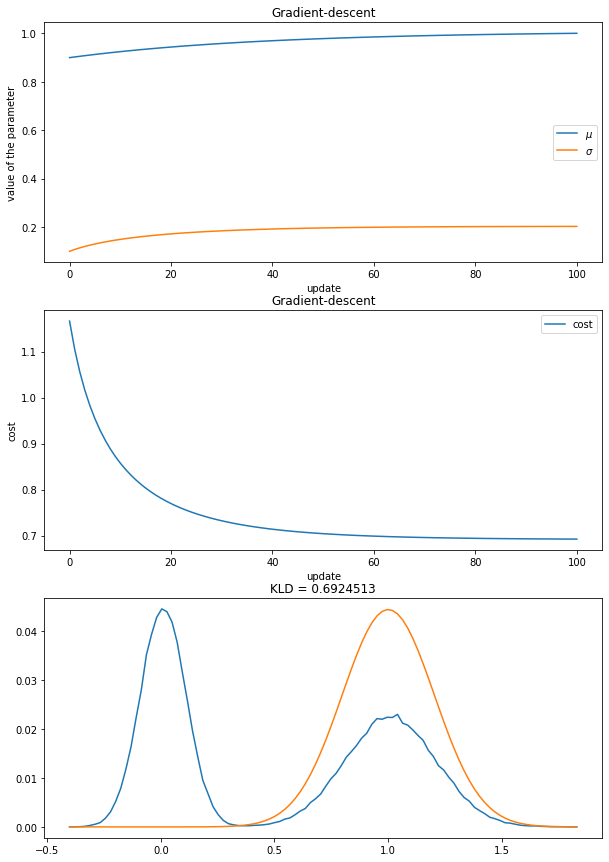

In [491]:
mu = 0.9
sigma = 0.1
mus = [mu]
sigmas = [sigma]
loss = [KLD2(gaussian(mu,sigma),p_total)]

eta = 0.001
for i in range(100):
    mu = mus[-1] - eta*grad_mu2(p_total,mus[-1],sigmas[-1])
    sigma = sigmas[-1] -eta*grad_sigma2(p_total,mus[-1],sigmas[-1])
    mus.append(mu)
    sigmas.append(sigma)
    loss.append(KLD2(gaussian(mu,sigma),p_total))

plt.figure(figsize= (10,15))
plt.subplot(3,1,1)
plt.plot(mus,'-',label='$\mu$')
plt.plot(sigmas,'-',label='$\sigma$')
plt.legend()
plt.title('Gradient-descent')
plt.xlabel('update')
plt.ylabel('value of the parameter')

plt.subplot(3,1,2)
plt.plot(loss,'-',label='cost')
plt.legend()
plt.title('Gradient-descent')
plt.xlabel('update')
plt.ylabel('cost')

plt.subplot(3,1,3)
plt.plot(bins[1:],p_total)
plt.plot(bins[1:],gaussian(mus[-1],sigmas[-1]))
plt.title('KLD = %f3'%KLD2(gaussian(mus[-1],sigmas[-1]),p_total))

In [500]:
def SGD(epochs, ps, mu0, sigma0, eta = 0.001, xs= bins[1:]):
    mu = mu0
    sigma = sigma0
    mus = [mu]
    sigmas = [sigma]
    loss = []
    for epoch in range(epochs):
        for p in ps:
            mu = mus[-1] - eta*grad_mu2(p,mus[-1],sigmas[-1])
            sigma = sigmas[-1] -eta*grad_sigma2(p,mus[-1],sigmas[-1])
            mus.append(mu)
            sigmas.append(sigma)
        loss.append(KLD2(gaussian(mu,sigma),p_total))
    return mus,sigmas,loss

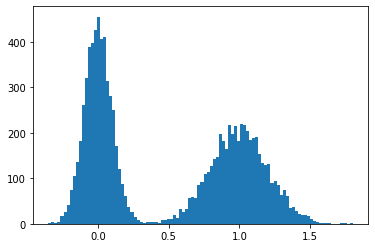

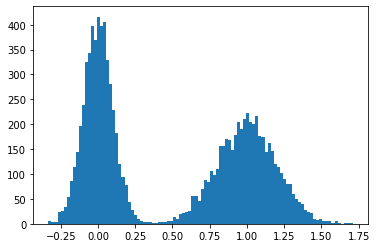

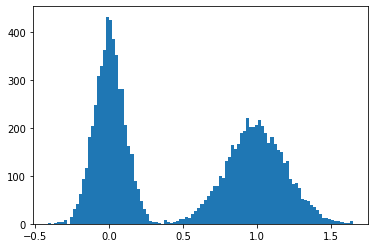

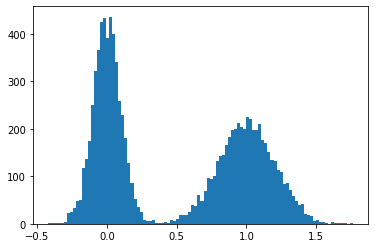

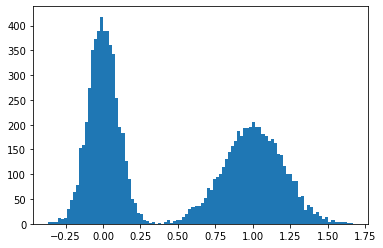

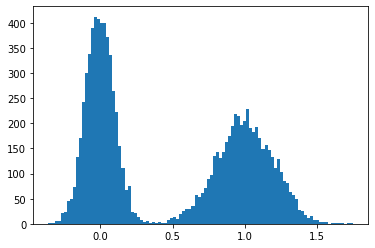

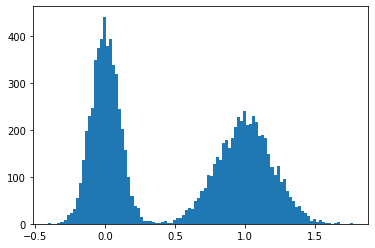

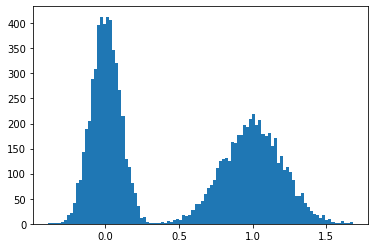

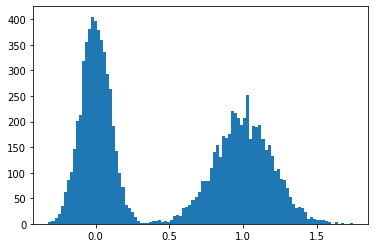

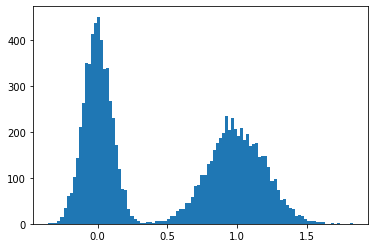

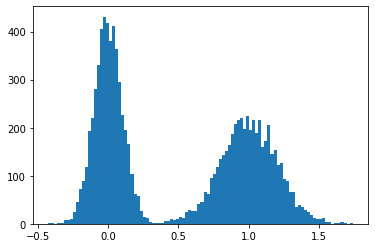

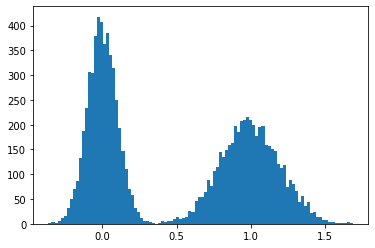

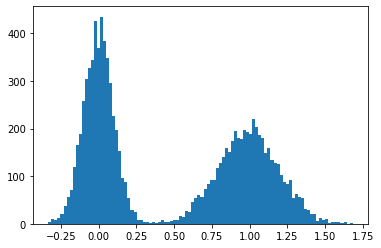

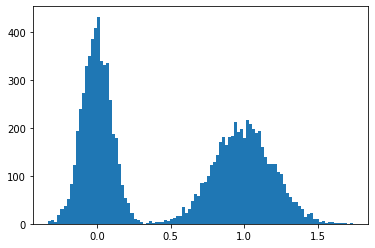

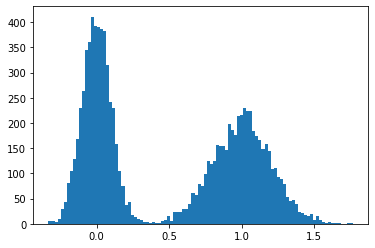

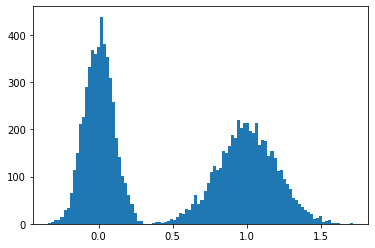

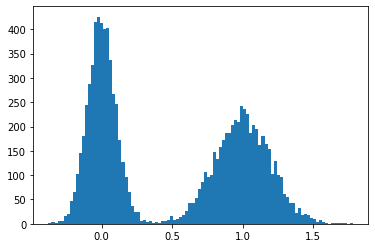

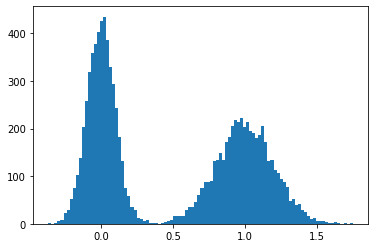

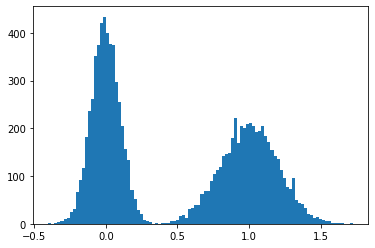

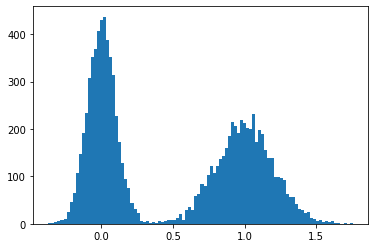

In [498]:
#form-batches
batch_size = 10000
random.shuffle(truedatas)
datas = np.array(np.split(truedatas,int(2*number/batch_size)))
temp = np.array([0.]*100)
for data in datas:
    fig = plt.figure()
    counts,bins,_ = plt.hist(data,bins=100)
    temp = np.r_[temp,counts/sum(counts)]
ps = temp[100:].reshape(int(2*number/batch_size),int(100))

Text(0, 0.5, 'parameter value')

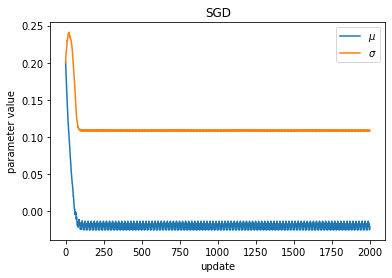

In [514]:
mu0 = 0.2
sigma0 = 0.2
# ps = formbatches(truedatas)
mus, sigmas, loss = SGD(100, ps, mu0, sigma0)
# print(len(sigmas))
plt.plot(mus,label='$\mu$')
plt.plot(sigmas,label='$\sigma$')
plt.title('SGD')
plt.legend()
plt.xlabel('update')
plt.ylabel('parameter value')
# print('mus:',mus[0],mus[-1])
# print('sigmas:',sigmas[0],sigmas[-1])
# print('loss:',loss[0],loss[-1])

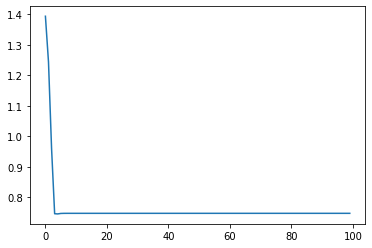

In [515]:
plt.plot(loss)

Text(0.5, 1.0, 'KLD = 0.7475383')

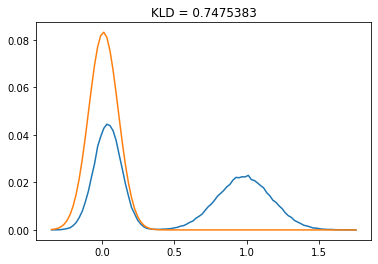

In [516]:
plt.plot(bins[1:],p_total)
plt.plot(bins[1:],gaussian(mus[-1],sigmas[-1]))
plt.title('KLD = %f3'%KLD2(gaussian(mus[-1],sigmas[-1]),p_total))

Text(0, 0.5, 'parameter value')

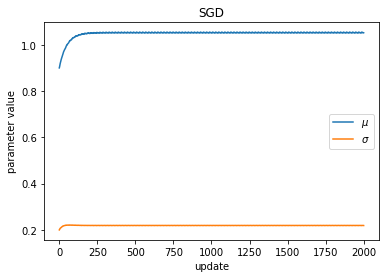

In [517]:
mu0 = 0.9
sigma0 = 0.2
# ps = formbatches(truedatas)
mus, sigmas, loss = SGD(100, ps, mu0, sigma0)
# print(len(sigmas))
plt.plot(mus,label='$\mu$')
plt.plot(sigmas,label='$\sigma$')
plt.title('SGD')
plt.legend()
plt.xlabel('update')
plt.ylabel('parameter value')
# print('mus:',mus[0],mus[-1])
# print('sigmas:',sigmas[0],sigmas[-1])
# print('loss:',loss[0],loss[-1])

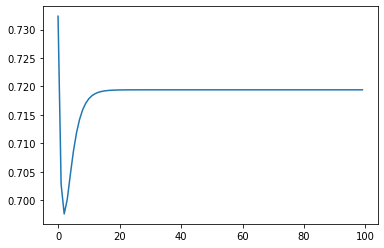

In [518]:
plt.plot(loss)

Text(0.5, 1.0, 'KLD = 0.7194013')

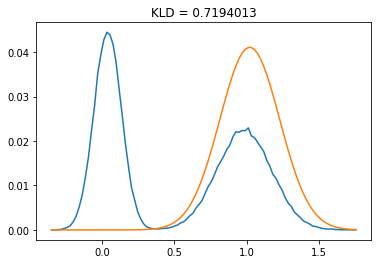

In [519]:
plt.plot(bins[1:],p_total)
plt.plot(bins[1:],gaussian(mus[-1],sigmas[-1]))
plt.title('KLD = %f3'%KLD2(gaussian(mus[-1],sigmas[-1]),p_total))